In [7]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime
import plotly.express as px

### Cases

In [2]:
df_cases = pd.read_csv('data_table_for_weekly_case_trends__the_united_states.csv')

In [3]:
df_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Geography           155 non-null    object
 1   Date                155 non-null    object
 2   Weekly Cases        155 non-null    int64 
 3   New Historic Cases  155 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 5.0+ KB


In [5]:
df_cases['Date'] = pd.to_datetime(df_cases['Date'])

Text(0, 0.5, 'Covid-19 Cases')

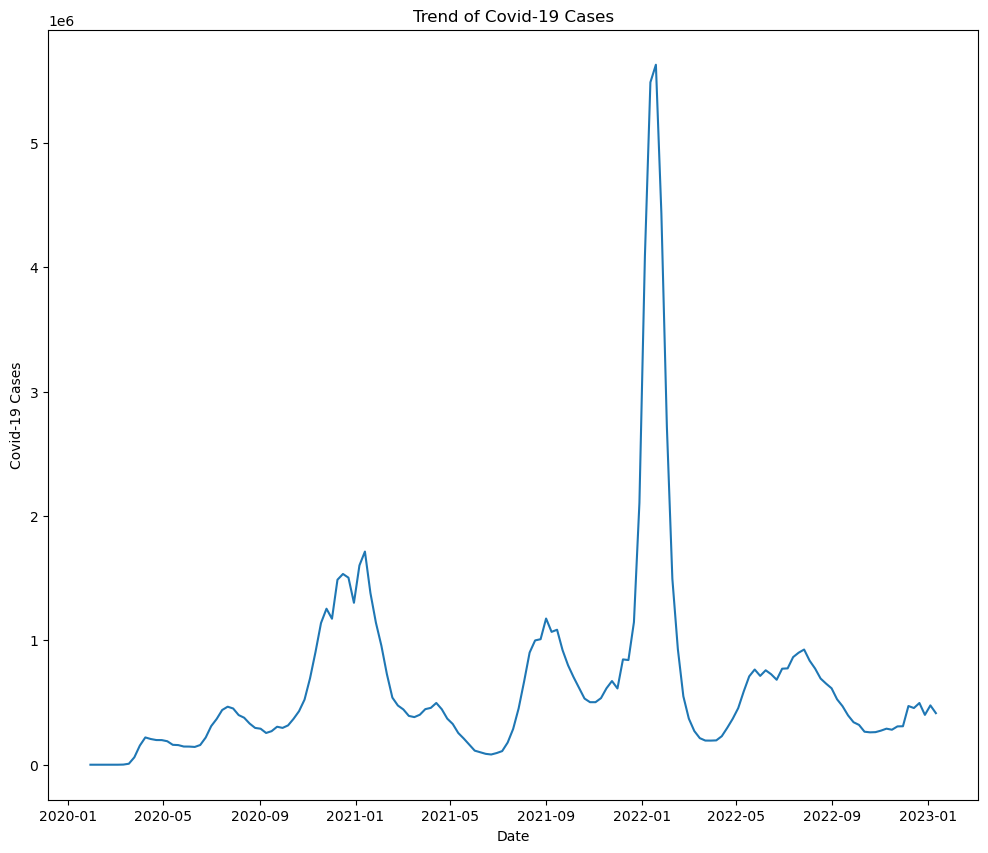

In [8]:
plt.figure(figsize=(12,10))
plot = sns.lineplot(x= df_cases['Date'], y = df_cases['Weekly Cases'])
plot.set_title('Trend of Covid-19 Cases')
plot.set_ylabel('Covid-19 Cases')

### Deaths

In [9]:
df_usa = pd.read_csv('data_table_for_weekly_death_trends__the_united_states.csv')

In [10]:
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Geography            155 non-null    object
 1   Date                 155 non-null    object
 2   Weekly Deaths        155 non-null    int64 
 3   New Historic Deaths  155 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 5.0+ KB


In [4]:
df_usa.head()

,Geography,Date,Weekly Deaths,New Historic Deaths
0,United States,Jan 11 2023,3907,86
1,United States,Jan 4 2023,2705,0
2,United States,Dec 28 2022,2425,0
3,United States,Dec 21 2022,2982,0
4,United States,Dec 14 2022,2613,0


In [5]:
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Geography            155 non-null    object
 1   Date                 155 non-null    object
 2   Weekly Deaths        155 non-null    int64 
 3   New Historic Deaths  155 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 5.0+ KB


In [6]:
df_usa['Date'] = pd.to_datetime(df_usa['Date'])

Text(0.5, 1.0, 'Trend of COVID-19 Deaths in USA')

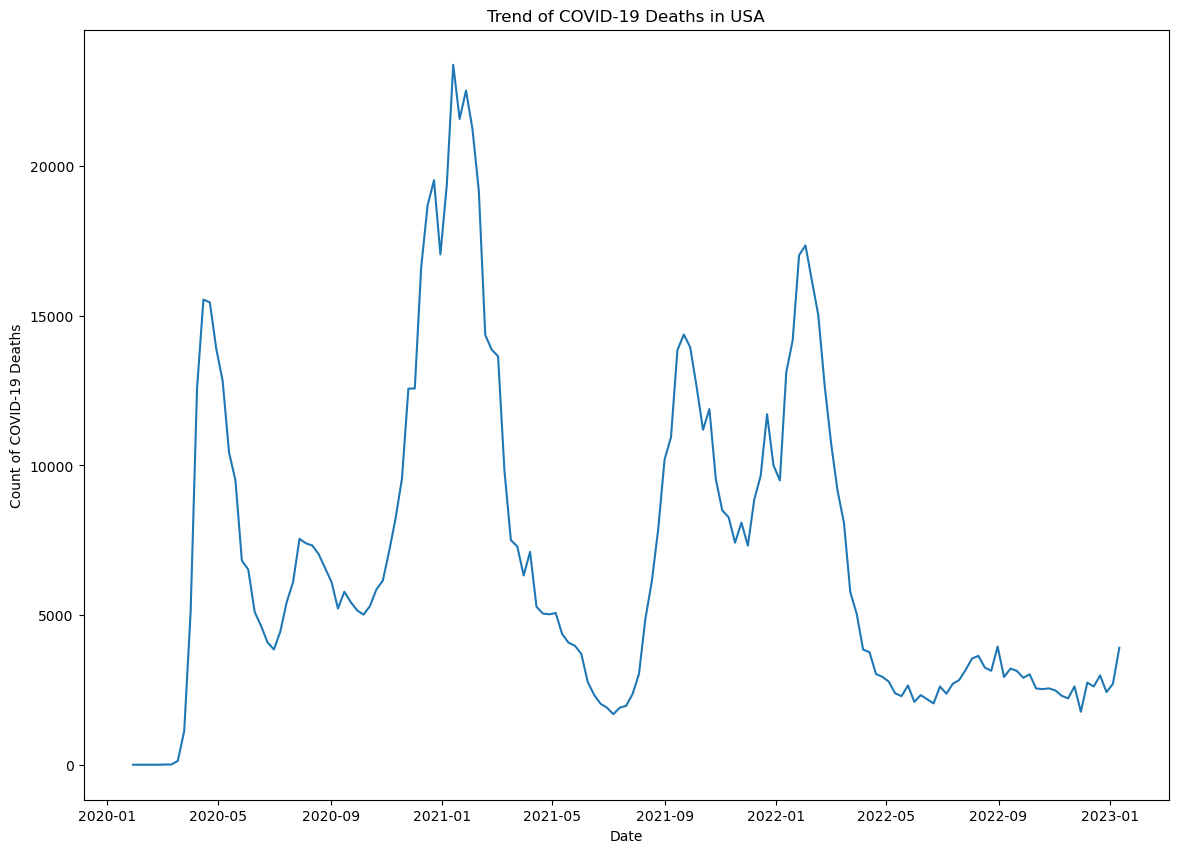

In [8]:
plt.figure(figsize=(14,10))
plot = sns.lineplot(x=df_usa['Date'], y= df_usa['Weekly Deaths'])
plot.set_ylabel('Count of COVID-19 Deaths')
plot.set_title('Trend of COVID-19 Deaths in USA')


### Cases in states

In [211]:
ls

1 COVID_project.ipynb
COVID-19 states.csv
Geometry_CODE_States.csv
covid19_vaccinations_in_the_united_states.csv
data_table_for_weekly_case_trends__the_united_states.csv
data_table_for_weekly_death_trends__the_united_states.csv
united_states_covid19_cases_deaths_and_testing_by_state.csv
world_country_and_usa_states_latitude_and_longitude_values.csv


In [212]:
df_states = pd.read_csv('COVID-19 states.csv')

In [213]:
geometry_df = pd.read_csv('Geometry_CODE_States.csv')

In [214]:
geometry_df.drop('Unnamed: 0', axis=1, inplace=True)

In [215]:
set(df_state['State/Territory']) - set(geometry_df['usa_state'])

{'American Samoa',
 'Federated States of Micronesia',
 'Guam',
 'New York City',
 'New York*',
 'Northern Mariana Islands',
 'Palau',
 'Republic of Marshall Islands',
 'United States of America',
 'Virgin Islands'}

In [218]:
df_states.set_index('State/Territory', inplace=True)

In [219]:
df_states.drop(labels=['American Samoa',
 'Federated States of Micronesia',
 'Guam',
 'New York City',
 'Northern Mariana Islands',
 'Palau',
 'Republic of Marshall Islands',
 'United States of America',
 'Virgin Islands'], axis=0, inplace=True)

In [220]:
df_states.reset_index(inplace=True)

In [221]:
geometry_df[:5]

,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AK,63.588753,-154.493062,Alaska
1,AL,32.318231,-86.902298,Alabama
2,AR,35.201050,-91.831833,Arkansas
3,AZ,34.048928,-111.093731,Arizona
4,CA,36.778261,-119.417932,California


In [223]:
geometry_df.sort_values(by = 'usa_state', inplace=True)

In [224]:
geometry_df.reset_index(inplace=True)

In [225]:
df_states.sort_values(by= 'State/Territory', inplace=True)

In [226]:
df_states = pd.concat([geometry_df, df_states], axis=1)

In [228]:
df_states.drop(['index', 'usa_state_latitude', 'usa_state_longitude', 'usa_state'], axis=1, inplace=True)

In [232]:
df_states.head()

,usa_state_code,State/Territory,Total Cases,New Cases in Past Week,Case Rate per 100000,Total Deaths,New Deaths in Past Week,Death Rate per 100000,Weekly Cases Rate per 100000,Weekly Death Rate per 100000,Total % Positive,% Positive Last 30 Days,% Positive Last 7 Days,# Tests per 100K,Total # Tests,# Tests per 100K Last 7 Days,Total # Tests Last 7 Days,# Tests per 100K Last 30 Days,Total # Tests Last 30 Days
0,AL,Alabama,1596149.0,8925.0,32553.0,20820.0,44.0,424.0,182.0,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AK,Alaska,288965.0,470.0,39501.0,1418.0,0.0,193.0,64.2,0.0,8-9.9%,5-7.9%,10-14.9%,645631.723923,4720588.0,674.41,4931.0,3587.05,26227.0
2,AZ,Arizona,2391895.0,7374.0,32862.0,32503.0,192.0,446.0,101.3,2.6,10-14.9%,10-14.9%,10-14.9%,215464.842824,15990510.0,307.62,22830.0,1491.05,110657.0
3,AR,Arkansas,990427.0,3377.0,32820.0,12736.0,37.0,422.0,111.9,1.2,10-14.9%,10-14.9%,10-14.9%,174868.718986,5299435.0,340.24,10311.0,1594.84,48332.0
4,CA,California,11914952.0,44537.0,30155.0,98398.0,360.0,249.0,112.7,0.9,NaN,NaN,NaN,426144.349744,167764840.0,1029.71,405376.0,5239.40,2062652.0


In [252]:
df_states['Case Rate per 100000'].min()

22016.0

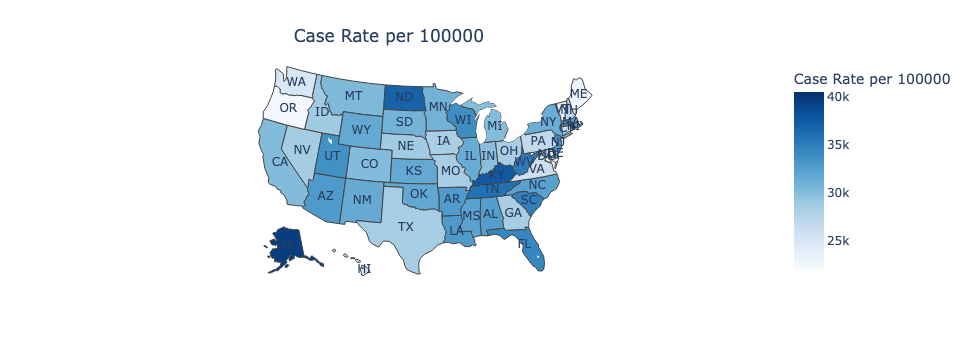

In [256]:
fig = px.choropleth(df_states,
             locations= df_states['usa_state_code'],
             locationmode= 'USA-states',
             scope='usa',
             color= 'Case Rate per 100000',
             hover_data = ['Case Rate per 100000'],
             color_continuous_scale= 'blues',
             )


fig.add_scattergeo(locations = df_states['usa_state_code'],
                  hoverinfo= 'skip',
                  locationmode='USA-states',
                  text= df_states['usa_state_code'],
                  mode = 'text')

fig.update_layout(title= {'text': 'Case Rate per 100000',
                         'xanchor': 'center',
                         'yanchor': 'top',
                         'x':0.4})

fig.show()

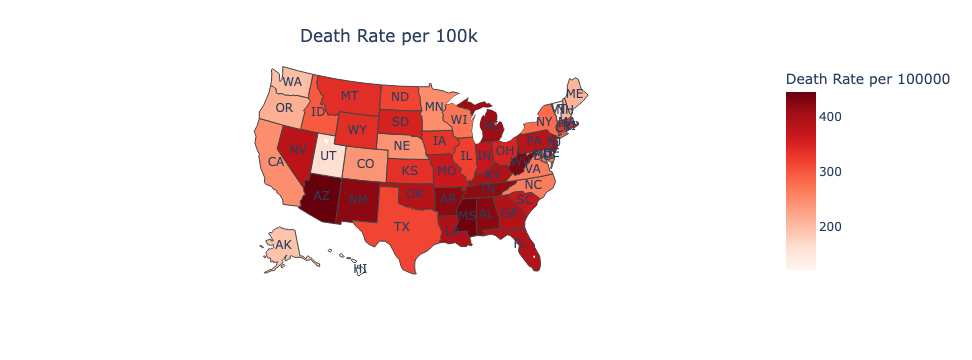

In [266]:
fig = px.choropleth(df_states,
             locations= df_states['usa_state_code'],
             locationmode= 'USA-states',
             scope='usa',
             color= 'Death Rate per 100000',
             hover_data = ['Death Rate per 100000', 'State/Territory'],
             color_continuous_scale= 'reds',
             )
fig.add_scattergeo(locations = df_states['usa_state_code'],
                  hoverinfo= 'skip',
                  locationmode='USA-states',
                  text= df_states['usa_state_code'],
                  mode = 'text')
fig.update_layout(title= {'text': 'Death Rate per 100k',
                         'xanchor': 'center',
                         'yanchor': 'top',
                         'x':0.4})
fig.show()

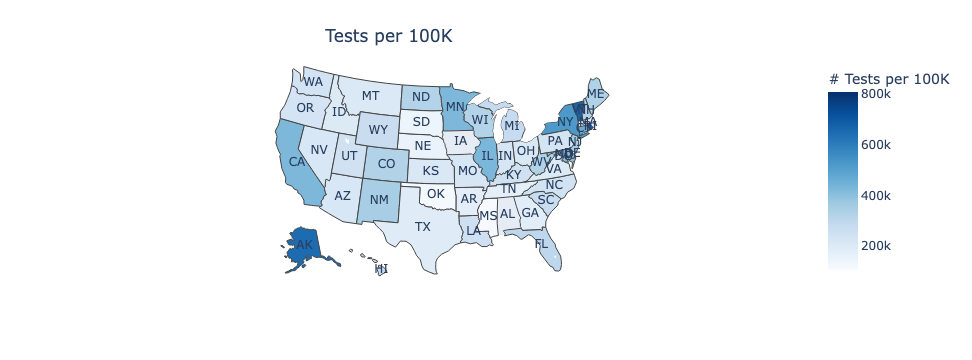

In [271]:
fig = px.choropleth(df_states,
             locations= df_states['usa_state_code'],
             locationmode= 'USA-states',
             scope='usa',
             color= '# Tests per 100K',
             hover_data = ['# Tests per 100K', 'State/Territory'],
             color_continuous_scale= 'blues',
             )
fig.add_scattergeo(locations = df_states['usa_state_code'],
                  hoverinfo= 'skip',
                  locationmode='USA-states',
                  text= df_states['usa_state_code'],
                  mode = 'text')
fig.update_layout(title= {'text': 'Tests per 100K',
                         'xanchor': 'center',
                         'yanchor': 'top',
                         'x':0.4})
fig.show()

### Vaccine 

In [280]:
df_vaccine = pd.read_csv('covid19_vaccinations_in_the_united_states.csv', index_col= 'Jurisdiction (State/Territory) or Federal Entity')

In [281]:
df_vaccine.head()

,Total doses distributed,Doses distributed per 100K pop,Doses distributed by jurisdiction per 100K of 18+ pop,Total doses administered by jurisdiction,Doses administered by jurisdiction per 100K pop,Doses administered by jurisdiction to 18+ pop,Doses administered by jurisdiction per 100K of 18+ pop,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with at least one dose,...,Residents 5+ with an updated (bivalent) booster dose,Percent of 5+ pop with an updated (bivalent) booster dose,Residents 12+ with an updated (bivalent) booster dose,Percent of 12+ pop with an updated (bivalent) booster dose,Residents 18+ with an updated (bivalent) booster dose,Percent of 18+ pop with an updated (bivalent) booster dose,Residents 65+ with an updated (bivalent) booster dose,Percent of 65+ pop with an updated (bivalent) booster dose,Children <5 with at least one dose,Total number of updated (bivalent) booster doses administered
Jurisdiction (State/Territory) or Federal Entity,,,,,,,,,,,,,,,,,,,,,
United States,942343115,283831.0,364944.0,665076272,200319.0,598135169,231642.0,268546218,80.9,237131660,...,48229842,15.4,47251809,16.7,45673736,17.7,20891398,38.1,1726051.0,48469426.0
Alaska,2070255,282998.0,375344.0,1306133,178544.0,1159854,210285.0,532458,72.8,465247,...,88387,13.0,86300,14.2,82681,15.0,34965,38.2,NaN,NaN
Alabama,11918030,243067.0,312409.0,6937933,141498.0,6455650,169223.0,3179484,64.8,2924356,...,319325,6.9,318668,7.6,312710,8.2,174956,20.6,NaN,NaN
Arkansas,8058700,267039.0,347710.0,4814103,159523.0,4383797,189148.0,2102856,69.7,1881597,...,291755,10.3,288588,11.3,281971,12.2,158158,30.2,NaN,NaN
American Samoa,128480,271101.0,410021.0,114961,242575.0,85505,272874.0,46141,95.0,32760,...,383,0.9,380,1.0,377,1.2,146,4.5,NaN,NaN


In [282]:
df_vaccine.drop('United States',axis=0,  inplace=True)

In [284]:
df_vaccine.head(3)

,Total doses distributed,Doses distributed per 100K pop,Doses distributed by jurisdiction per 100K of 18+ pop,Total doses administered by jurisdiction,Doses administered by jurisdiction per 100K pop,Doses administered by jurisdiction to 18+ pop,Doses administered by jurisdiction per 100K of 18+ pop,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with at least one dose,...,Residents 5+ with an updated (bivalent) booster dose,Percent of 5+ pop with an updated (bivalent) booster dose,Residents 12+ with an updated (bivalent) booster dose,Percent of 12+ pop with an updated (bivalent) booster dose,Residents 18+ with an updated (bivalent) booster dose,Percent of 18+ pop with an updated (bivalent) booster dose,Residents 65+ with an updated (bivalent) booster dose,Percent of 65+ pop with an updated (bivalent) booster dose,Children <5 with at least one dose,Total number of updated (bivalent) booster doses administered
Jurisdiction (State/Territory) or Federal Entity,,,,,,,,,,,,,,,,,,,,,
Alaska,2070255,282998.0,375344.0,1306133,178544.0,1159854,210285.0,532458,72.8,465247,...,88387,13.0,86300,14.2,82681,15.0,34965,38.2,NaN,NaN
Alabama,11918030,243067.0,312409.0,6937933,141498.0,6455650,169223.0,3179484,64.8,2924356,...,319325,6.9,318668,7.6,312710,8.2,174956,20.6,NaN,NaN
Arkansas,8058700,267039.0,347710.0,4814103,159523.0,4383797,189148.0,2102856,69.7,1881597,...,291755,10.3,288588,11.3,281971,12.2,158158,30.2,NaN,NaN


In [285]:
df_latlong = pd.read_csv('world_country_and_usa_states_latitude_and_longitude_values.csv')

In [286]:
df_latlong = df_latlong[['usa_state_code' ,'usa_state_latitude' ,'usa_state_longitude' ,'usa_state']]
df_latlong.dropna(inplace=True)

In [287]:
# index
df_vaccine.drop(['American Samoa',
 'Bureau of Prisons',
 'Dept of Defense',
 'Federated States of Micronesia',
 'Guam',
 'Indian Health Svc',
 'Marshall Islands',
 'Northern Mariana Islands',
 'Republic of Palau',
 'Veterans Health',
 'Virgin Islands'], axis=0, inplace=True)

In [288]:
df_vaccine.shape

(52, 62)

In [289]:
df_latlong.shape

(52, 4)

In [290]:
df_vaccine.reset_index(inplace=True)

In [291]:
df_vaccine.head()

,Jurisdiction (State/Territory) or Federal Entity,Total doses distributed,Doses distributed per 100K pop,Doses distributed by jurisdiction per 100K of 18+ pop,Total doses administered by jurisdiction,Doses administered by jurisdiction per 100K pop,Doses administered by jurisdiction to 18+ pop,Doses administered by jurisdiction per 100K of 18+ pop,Residents with at least one dose,Percent of total pop with at least one dose,...,Residents 5+ with an updated (bivalent) booster dose,Percent of 5+ pop with an updated (bivalent) booster dose,Residents 12+ with an updated (bivalent) booster dose,Percent of 12+ pop with an updated (bivalent) booster dose,Residents 18+ with an updated (bivalent) booster dose,Percent of 18+ pop with an updated (bivalent) booster dose,Residents 65+ with an updated (bivalent) booster dose,Percent of 65+ pop with an updated (bivalent) booster dose,Children <5 with at least one dose,Total number of updated (bivalent) booster doses administered
0,Alaska,2070255,282998.0,375344.0,1306133,178544.0,1159854,210285.0,532458,72.8,...,88387,13.0,86300,14.2,82681,15.0,34965,38.2,NaN,NaN
1,Alabama,11918030,243067.0,312409.0,6937933,141498.0,6455650,169223.0,3179484,64.8,...,319325,6.9,318668,7.6,312710,8.2,174956,20.6,NaN,NaN
2,Arkansas,8058700,267039.0,347710.0,4814103,159523.0,4383797,189148.0,2102856,69.7,...,291755,10.3,288588,11.3,281971,12.2,158158,30.2,NaN,NaN
3,Arizona,19106550,262499.0,338860.0,14325594,196815.0,12803002,227065.0,5615822,77.2,...,957108,14.0,939148,15.1,906558,16.1,458884,35.1,NaN,NaN
4,California,116284095,294299.0,379795.0,86808719,219701.0,76906120,251183.0,33340800,84.4,...,6882626,18.5,6714568,20.0,6453508,21.1,2481245,42.5,NaN,NaN


In [292]:
df_final = pd.concat([df_latlong, df_vaccine], axis=1)

In [294]:
df_final.drop('Jurisdiction (State/Territory) or Federal Entity', axis=1, inplace=True)

In [295]:
df_final.head()

,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state,Total doses distributed,Doses distributed per 100K pop,Doses distributed by jurisdiction per 100K of 18+ pop,Total doses administered by jurisdiction,Doses administered by jurisdiction per 100K pop,Doses administered by jurisdiction to 18+ pop,...,Residents 5+ with an updated (bivalent) booster dose,Percent of 5+ pop with an updated (bivalent) booster dose,Residents 12+ with an updated (bivalent) booster dose,Percent of 12+ pop with an updated (bivalent) booster dose,Residents 18+ with an updated (bivalent) booster dose,Percent of 18+ pop with an updated (bivalent) booster dose,Residents 65+ with an updated (bivalent) booster dose,Percent of 65+ pop with an updated (bivalent) booster dose,Children <5 with at least one dose,Total number of updated (bivalent) booster doses administered
0,AK,63.588753,-154.493062,Alaska,2070255,282998.0,375344.0,1306133,178544.0,1159854,...,88387,13.0,86300,14.2,82681,15.0,34965,38.2,NaN,NaN
1,AL,32.318231,-86.902298,Alabama,11918030,243067.0,312409.0,6937933,141498.0,6455650,...,319325,6.9,318668,7.6,312710,8.2,174956,20.6,NaN,NaN
2,AR,35.201050,-91.831833,Arkansas,8058700,267039.0,347710.0,4814103,159523.0,4383797,...,291755,10.3,288588,11.3,281971,12.2,158158,30.2,NaN,NaN
3,AZ,34.048928,-111.093731,Arizona,19106550,262499.0,338860.0,14325594,196815.0,12803002,...,957108,14.0,939148,15.1,906558,16.1,458884,35.1,NaN,NaN
4,CA,36.778261,-119.417932,California,116284095,294299.0,379795.0,86808719,219701.0,76906120,...,6882626,18.5,6714568,20.0,6453508,21.1,2481245,42.5,NaN,NaN


In [296]:
df_final.set_index('usa_state', inplace=True)

In [300]:
dist_vaccine = df_final['Doses distributed per 100K pop'].sort_values(ascending=True)[:20]

Text(0.5, 0, 'Total doses distributed per 100k pop')

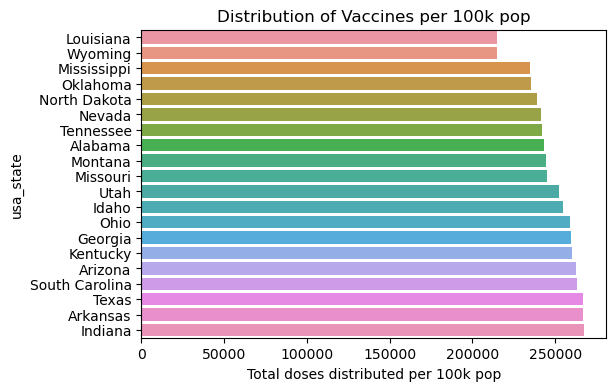

In [301]:
plt.figure(figsize=(6,4))
plt.title('Distribution of Vaccines per 100k pop')
sns.barplot(x = dist_vaccine.values, y = dist_vaccine.index)
plt.xlabel('Total doses distributed per 100k pop')

In [302]:
adm_vaccine = df_final['Doses administered by jurisdiction per 100K pop'].sort_values(ascending=False)[:20]

Text(0.5, 0, 'Doses administered')

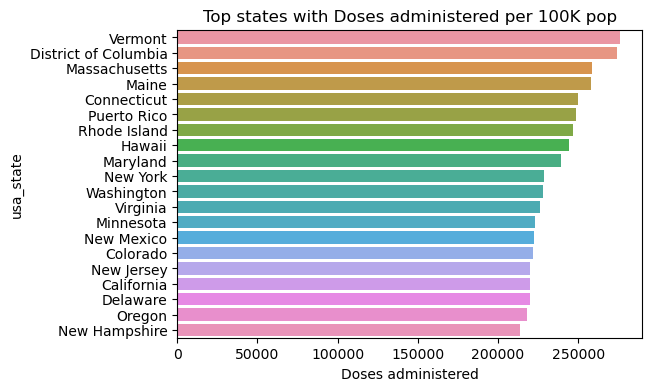

In [303]:
plt.figure(figsize=(6,4))
plt.title('Top states with Doses administered per 100K pop')
sns.barplot(x = adm_vaccine.values, y = adm_vaccine.index)
plt.xlabel('Doses administered')

In [304]:
adm_vaccine = df_final['Doses administered by jurisdiction per 100K pop'].sort_values(ascending=True)[:10]

Text(0.5, 0, 'Doses administered')

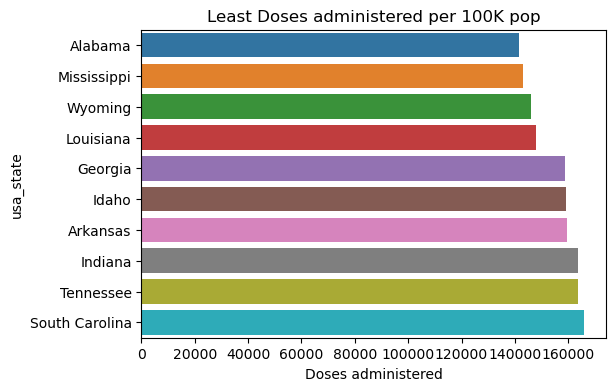

In [305]:
plt.figure(figsize=(6,4))
plt.title('Least Doses administered per 100K pop')
sns.barplot(x = adm_vaccine.values, y = adm_vaccine.index)
plt.xlabel('Doses administered')

Text(0.5, 0, 'Percent of total pop with at least one dose')

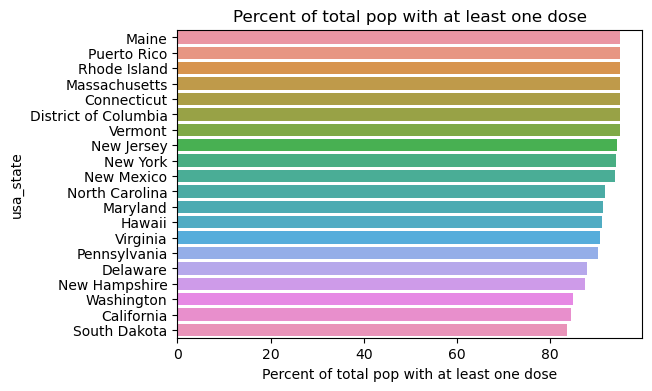

In [306]:
residents_one = df_final['Percent of total pop with at least one dose'].sort_values(ascending=False)[:20]
plt.figure(figsize=(6,4))
plt.title('Percent of total pop with at least one dose')
sns.barplot(x = residents_one.values, y = residents_one.index)
plt.xlabel('Percent of total pop with at least one dose')

In [308]:
df_final.head()


,usa_state_code,usa_state_latitude,usa_state_longitude,Total doses distributed,Doses distributed per 100K pop,Doses distributed by jurisdiction per 100K of 18+ pop,Total doses administered by jurisdiction,Doses administered by jurisdiction per 100K pop,Doses administered by jurisdiction to 18+ pop,Doses administered by jurisdiction per 100K of 18+ pop,...,Residents 5+ with an updated (bivalent) booster dose,Percent of 5+ pop with an updated (bivalent) booster dose,Residents 12+ with an updated (bivalent) booster dose,Percent of 12+ pop with an updated (bivalent) booster dose,Residents 18+ with an updated (bivalent) booster dose,Percent of 18+ pop with an updated (bivalent) booster dose,Residents 65+ with an updated (bivalent) booster dose,Percent of 65+ pop with an updated (bivalent) booster dose,Children <5 with at least one dose,Total number of updated (bivalent) booster doses administered
usa_state,,,,,,,,,,,,,,,,,,,,,
Alaska,AK,63.588753,-154.493062,2070255,282998.0,375344.0,1306133,178544.0,1159854,210285.0,...,88387,13.0,86300,14.2,82681,15.0,34965,38.2,NaN,NaN
Alabama,AL,32.318231,-86.902298,11918030,243067.0,312409.0,6937933,141498.0,6455650,169223.0,...,319325,6.9,318668,7.6,312710,8.2,174956,20.6,NaN,NaN
Arkansas,AR,35.201050,-91.831833,8058700,267039.0,347710.0,4814103,159523.0,4383797,189148.0,...,291755,10.3,288588,11.3,281971,12.2,158158,30.2,NaN,NaN
Arizona,AZ,34.048928,-111.093731,19106550,262499.0,338860.0,14325594,196815.0,12803002,227065.0,...,957108,14.0,939148,15.1,906558,16.1,458884,35.1,NaN,NaN
California,CA,36.778261,-119.417932,116284095,294299.0,379795.0,86808719,219701.0,76906120,251183.0,...,6882626,18.5,6714568,20.0,6453508,21.1,2481245,42.5,NaN,NaN


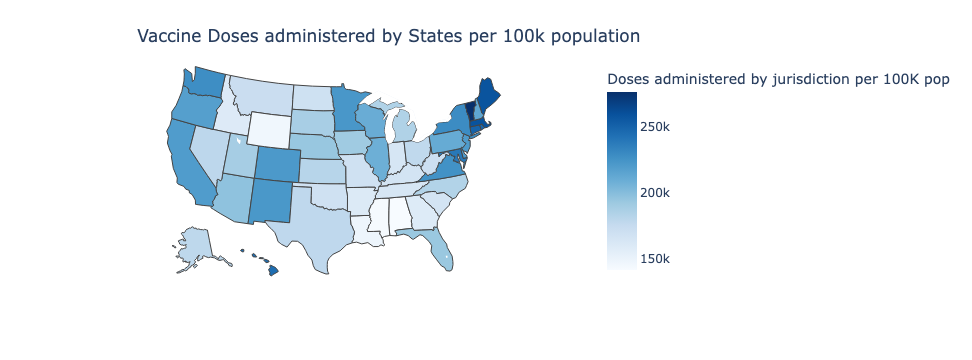

In [311]:
fig = px.choropleth(df_final,
             locations= df_final['usa_state_code'],
             locationmode= 'USA-states',
             scope='usa',
             color= 'Doses administered by jurisdiction per 100K pop',
             hover_data = ['Doses administered by jurisdiction per 100K pop'],
             color_continuous_scale= 'blues',
             range_color= [141498, 276056]
             )


fig.add_scattergeo(locations = df_final.index,
                  hoverinfo= 'skip',
                  locationmode='USA-states',
                  text= df_final.index,
                  mode = 'text')

fig.update_layout(title= {'text': 'Vaccine Doses administered by States per 100k population',
                         'xanchor': 'center',
                         'yanchor': 'top',
                         'x':0.4})


### Covid-19 in colleges

In [312]:
df_colleges = pd.read_csv('colleges.csv')

In [314]:
df_colleges.head()

,date,state,county,city,ipeds_id,college,cases,cases_2021,notes
0,2021-05-26,Alabama,Madison,Huntsville,100654,Alabama A&M University,41,NaN,NaN
1,2021-05-26,Alabama,Montgomery,Montgomery,100724,Alabama State University,2,NaN,NaN
2,2021-05-26,Alabama,Limestone,Athens,100812,Athens State University,45,10.0,NaN
3,2021-05-26,Alabama,Lee,Auburn,100858,Auburn University,2742,567.0,NaN
4,2021-05-26,Alabama,Montgomery,Montgomery,100830,Auburn University at Montgomery,220,80.0,NaN


In [317]:
college_top = df_colleges.groupby('college').sum().sort_values('cases', ascending=False)[:10]

<AxesSubplot:title={'center':'colleges with most COVID-19 cases'}, xlabel='cases', ylabel='college'>

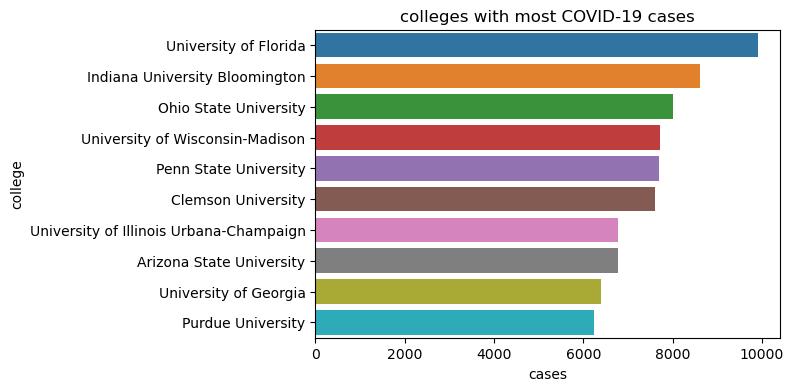

In [318]:
plt.figure(figsize=(6,4))
plt.title('colleges with most COVID-19 cases')
sns.barplot(x= college_top['cases'], y= college_top.index)